# Genetic Matcher

The GeneticMatcher can be used to optimize any function of the baseline covariates, both linear and non-linear. In this demo notebook, we show how to call the matcher in the PyBalance library, including an example of a non-linear balance function.

In [1]:
import logging 
logging.basicConfig(
    format="%(levelname)-4s [%(filename)s:%(lineno)d] %(message)s",
    level='INFO',
)

from pybalance.datasets import load_toy_data
from pybalance.utils import (
    BetaBalance, 
    BetaSquaredBalance, 
    BetaMaxBalance,
    GammaBalance, 
    GammaSquaredBalance,
    GammaXBalance,
    GammaXTreeBalance,
    MatchingData
)
from pybalance.genetic import GeneticMatcher, get_global_defaults
from pybalance.visualization import (
    plot_numeric_features, 
    plot_categoric_features, 
    plot_binary_features,
    plot_per_feature_loss,
    plot_joint_numeric_distributions
)

time_limit = 300

INFO [__init__.py:15] Loaded pybalance version 0.1.0.


In [2]:
m = load_toy_data()
m

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
0,27.645573,99.109461,166.063797,1.0,3,0,0.0,1.0,0.0,1.0,pool
1,33.210317,77.522517,148.959166,1.0,4,0,0.0,0.0,0.0,0.0,pool
2,31.281790,77.648391,126.943639,1.0,4,0,0.0,1.0,0.0,0.0,pool
3,37.924484,104.850881,170.009417,1.0,3,0,0.0,1.0,0.0,1.0,pool
4,60.925960,72.027406,144.841497,0.0,3,1,0.0,0.0,0.0,0.0,pool
...,...,...,...,...,...,...,...,...,...,...,...
10995,55.312681,54.187498,165.066254,1.0,5,2,0.0,0.0,0.0,1.0,target
10996,52.996259,67.788246,166.339659,1.0,4,2,0.0,1.0,0.0,0.0,target
10997,48.535829,76.827444,145.047366,1.0,1,1,0.0,0.0,0.0,0.0,target
10998,35.395455,60.470689,157.368874,1.0,4,0,0.0,0.0,0.0,0.0,target


## Optimize Beta (Mean Absolute SMD)

In [3]:
objective = beta = BetaBalance(m)
matcher = matcher_beta = GeneticMatcher(
    matching_data = m, 
    objective = objective,
    log_every = 1000,
    n_generations = 5000,
    time_limit = time_limit
)
matcher.get_params()

INFO [matcher.py:127] cpu


{'objective': 'beta',
 'candidate_population_size': 1000,
 'n_candidate_populations': 1024,
 'n_keep_best': 256,
 'n_voting_populations': 256,
 'n_mutation': 256,
 'n_generations': 5000,
 'n_iter_no_change': 100,
 'time_limit': 300,
 'max_batch_size_gb': 2,
 'seed': 1234,
 'verbose': True,
 'log_every': 1000,
 'initialization': {'benchmarks': {'propensity': 'include'},
  'sampling': {'propensity': 1.0, 'uniform': 1.0}}}

In [4]:
matcher_beta.match()

INFO [initialization.py:34] Optimizing balance with genetic algorithm ...
INFO [initialization.py:35] Initial balance scores:
INFO [initialization.py:40] 	beta:	0.164
INFO [initialization.py:41] Initializing candidate populations ...
INFO [initialization.py:89] Computing PROPENSITY 1-1 matching method ...
INFO [matcher.py:181] Training model SGDClassifier (iter 1/50, 0.001 min) ...
INFO [matcher.py:137] Best propensity score match found:
INFO [matcher.py:138] 	Model: SGDClassifier
INFO [matcher.py:140] 	* alpha: 1.5074398973827778
INFO [matcher.py:140] 	* class_weight: None
INFO [matcher.py:140] 	* early_stopping: True
INFO [matcher.py:140] 	* fit_intercept: True
INFO [matcher.py:140] 	* loss: log_loss
INFO [matcher.py:140] 	* max_iter: 1500
INFO [matcher.py:140] 	* penalty: l2
INFO [matcher.py:141] 	Score (beta): 0.0539
INFO [matcher.py:142] 	Solution time: 0.002 min
INFO [matcher.py:181] Training model LogisticRegression (iter 2/50, 0.003 min) ...
INFO [matcher.py:137] Best propensit

,age,weight,height,gender,country,haircolor,binary_0,binary_1,binary_2,binary_3,population
10000,25.588819,90.287540,138.373950,0.0,0,1,0.0,0.0,0.0,0.0,target
10001,58.178781,112.772237,131.676125,1.0,5,1,0.0,0.0,0.0,1.0,target
10002,45.214552,58.472329,174.666188,0.0,0,2,0.0,0.0,0.0,0.0,target
10003,42.283849,90.594823,141.086083,1.0,4,0,0.0,0.0,0.0,0.0,target
10004,67.793860,53.067147,187.259975,1.0,2,1,0.0,0.0,0.0,0.0,target
...,...,...,...,...,...,...,...,...,...,...,...
6908,58.666945,94.391993,193.966311,0.0,4,0,0.0,0.0,0.0,0.0,pool
680,51.865586,99.173482,185.612638,0.0,3,0,1.0,1.0,0.0,0.0,pool
1651,54.335090,76.216371,155.226873,1.0,1,2,0.0,0.0,0.0,0.0,pool
5202,31.836865,107.291581,194.642700,0.0,1,2,0.0,0.0,0.0,1.0,pool


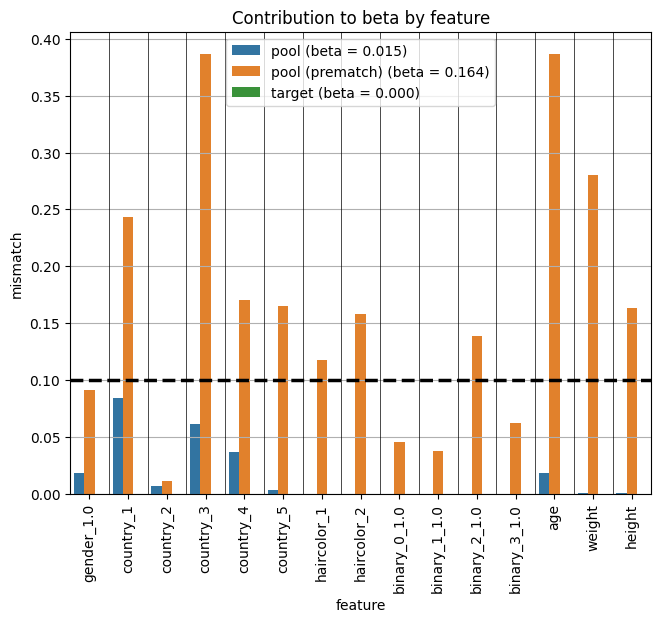

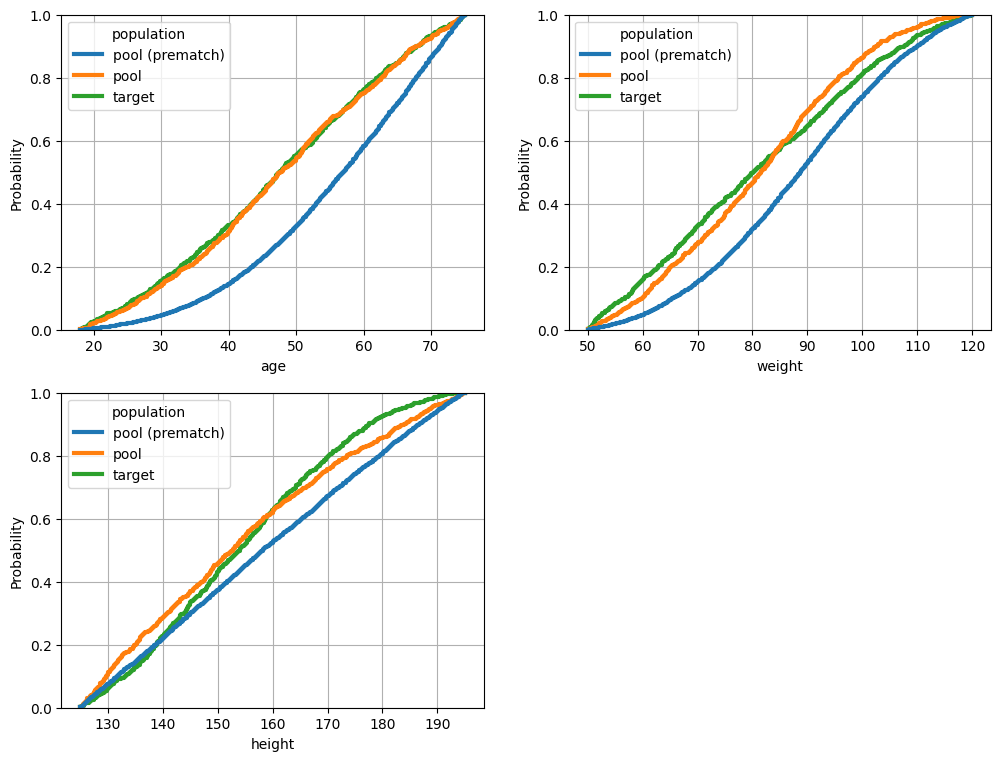

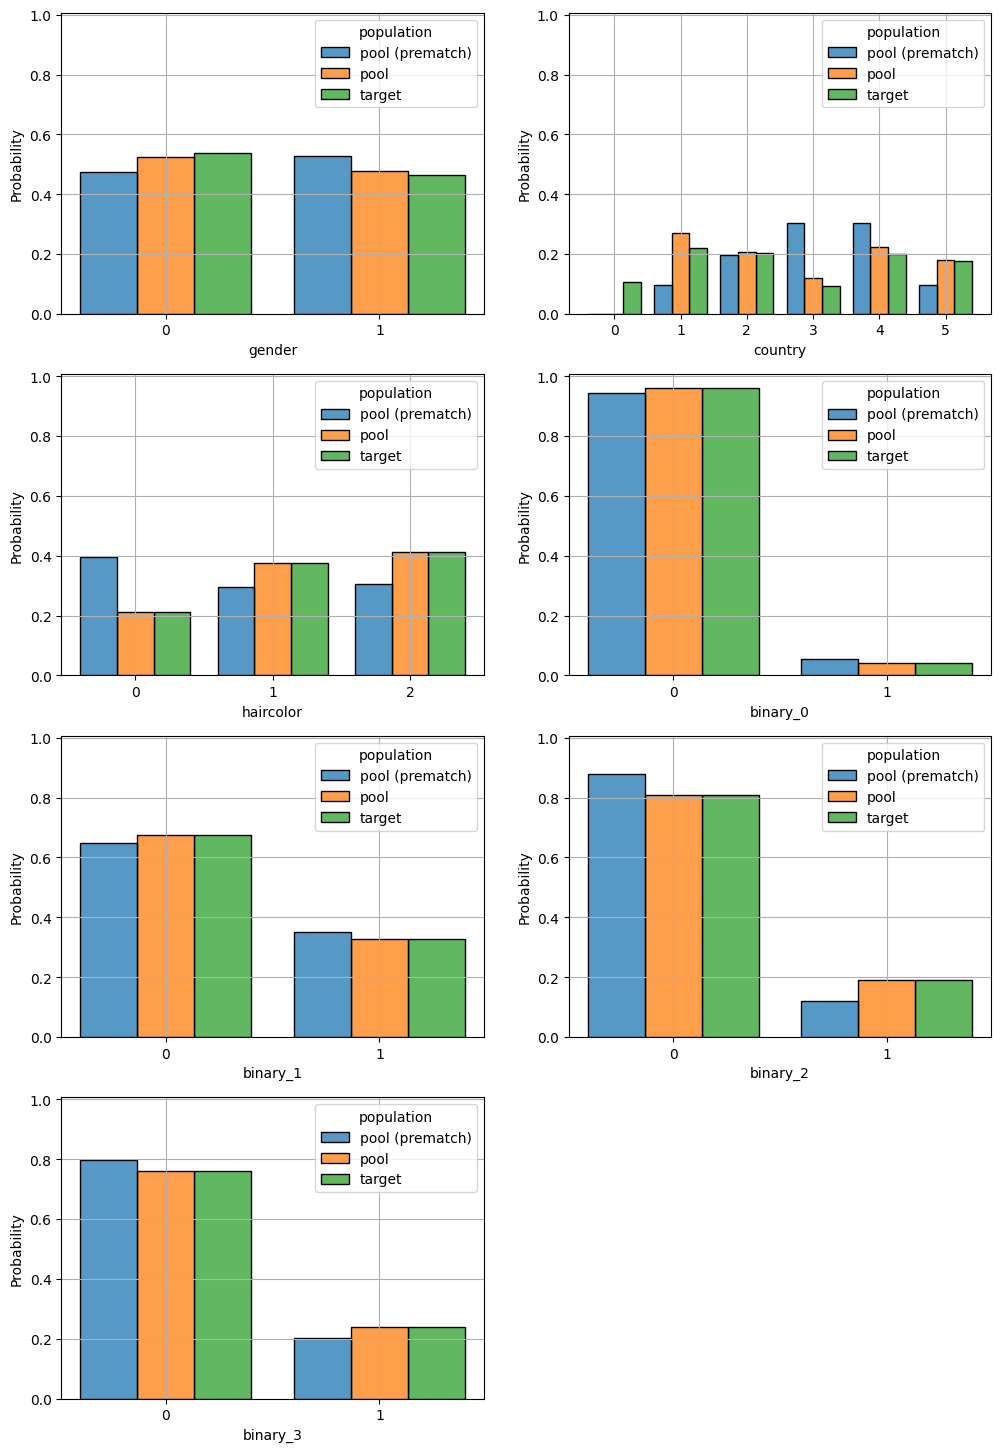

In [5]:
%matplotlib inline

match = matcher_beta.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])

## Optimize Beta^2

In [6]:
objective = beta2 = BetaSquaredBalance(m)
matcher = matcher_beta2 = GeneticMatcher(
    matching_data = m, 
    objective = objective,
    log_every = 1000,
    n_generations = 5000,
    time_limit = time_limit
)
matcher.get_params()

INFO [matcher.py:127] cpu


{'objective': 'beta_squared',
 'candidate_population_size': 1000,
 'n_candidate_populations': 1024,
 'n_keep_best': 256,
 'n_voting_populations': 256,
 'n_mutation': 256,
 'n_generations': 5000,
 'n_iter_no_change': 100,
 'time_limit': 300,
 'max_batch_size_gb': 2,
 'seed': 1234,
 'verbose': True,
 'log_every': 1000,
 'initialization': {'benchmarks': {'propensity': 'include'},
  'sampling': {'propensity': 1.0, 'uniform': 1.0}}}

In [7]:
match = matcher.match()

INFO [initialization.py:34] Optimizing balance with genetic algorithm ...
INFO [initialization.py:35] Initial balance scores:
INFO [initialization.py:40] 	beta_squared:	0.199
INFO [initialization.py:41] Initializing candidate populations ...
INFO [initialization.py:89] Computing PROPENSITY 1-1 matching method ...
INFO [matcher.py:181] Training model SGDClassifier (iter 1/50, 0.001 min) ...
INFO [matcher.py:137] Best propensity score match found:
INFO [matcher.py:138] 	Model: SGDClassifier
INFO [matcher.py:140] 	* alpha: 1.5074398973827778
INFO [matcher.py:140] 	* class_weight: None
INFO [matcher.py:140] 	* early_stopping: True
INFO [matcher.py:140] 	* fit_intercept: True
INFO [matcher.py:140] 	* loss: log_loss
INFO [matcher.py:140] 	* max_iter: 1500
INFO [matcher.py:140] 	* penalty: l2
INFO [matcher.py:141] 	Score (beta_squared): 0.0672
INFO [matcher.py:142] 	Solution time: 0.007 min
INFO [matcher.py:181] Training model LogisticRegression (iter 2/50, 0.007 min) ...
INFO [matcher.py:137

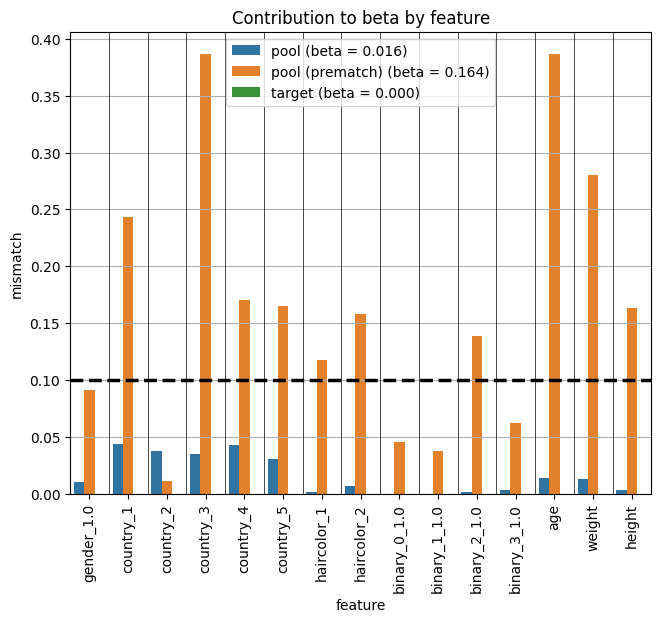

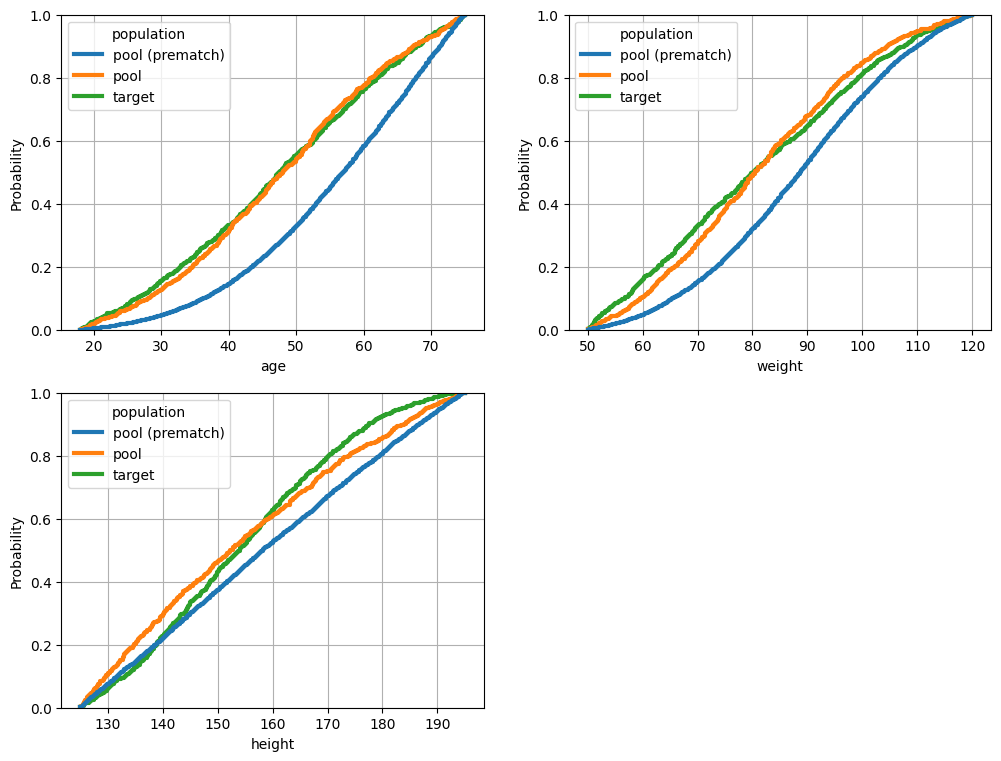

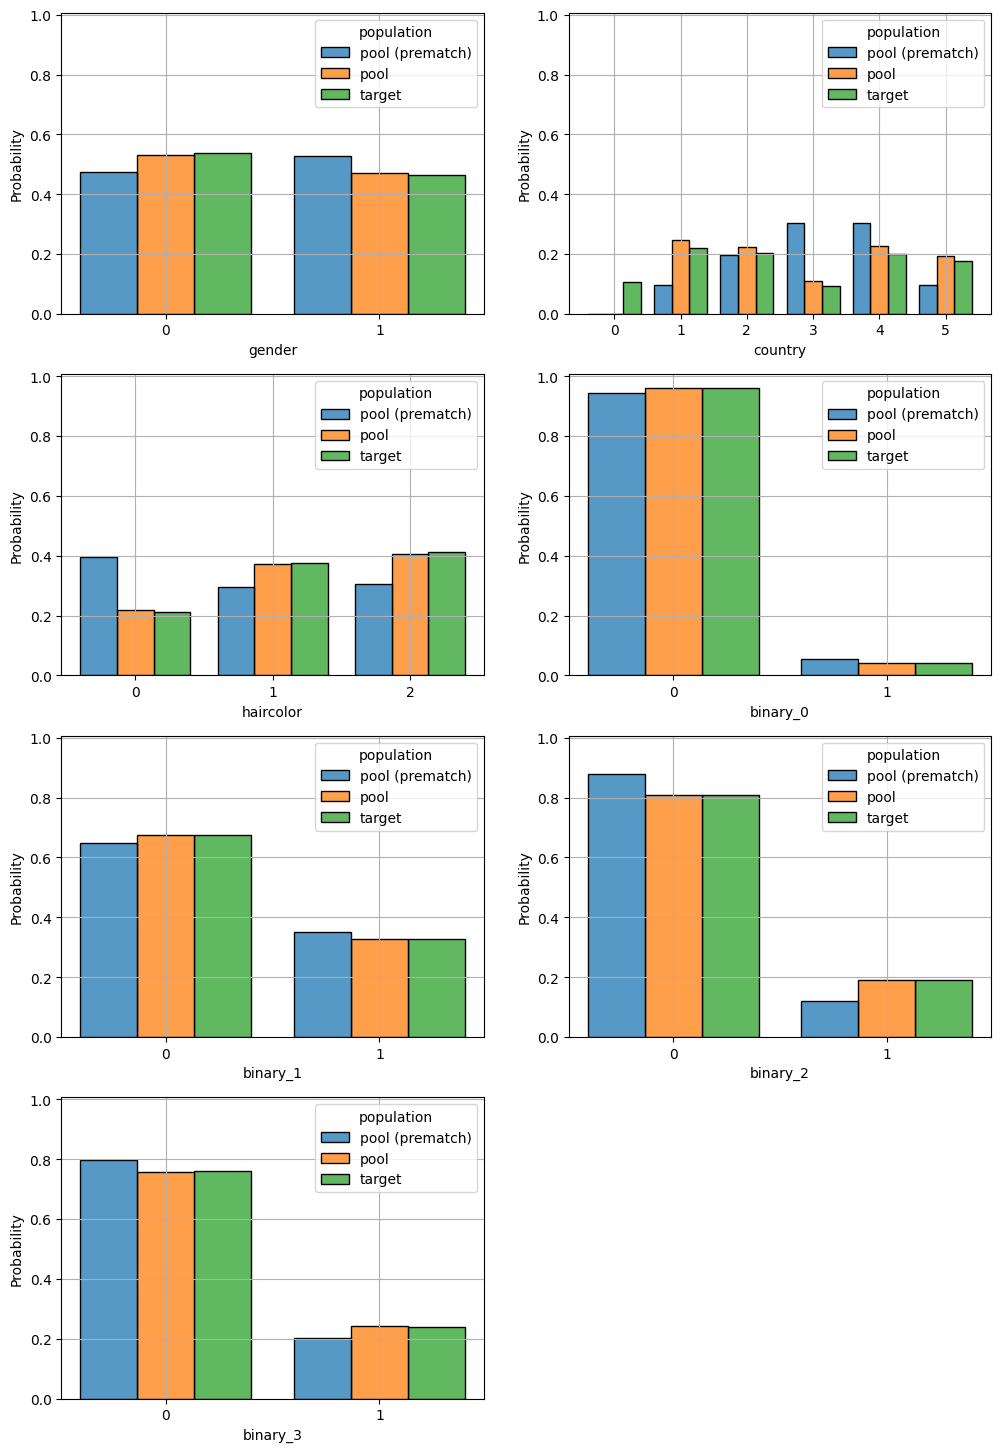

In [8]:
%matplotlib inline

match = matcher_beta2.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, beta, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])

## Optimize Beta (Mean Absolute SMD)

In [9]:
objective = gamma = GammaBalance(m, feature_weights={'age':2})
matcher = matcher_gamma = GeneticMatcher(
    matching_data = m, 
    objective = objective,
    log_every = 1000,
    n_generations = 5000,
    time_limit = time_limit
)
matcher.get_params()

INFO [preprocess.py:338] Discretized age with bins [18.06, 27.55, 37.04, 46.53, 56.02, 65.51, 75.0].
INFO [preprocess.py:338] Discretized weight with bins [50.01, 61.67, 73.33, 85.0, 96.66, 108.32, 119.99].
INFO [preprocess.py:338] Discretized height with bins [125.01, 136.67, 148.33, 160.0, 171.66, 183.33, 194.99].
INFO [matcher.py:127] cpu


{'objective': 'gamma',
 'candidate_population_size': 1000,
 'n_candidate_populations': 1024,
 'n_keep_best': 256,
 'n_voting_populations': 256,
 'n_mutation': 256,
 'n_generations': 5000,
 'n_iter_no_change': 100,
 'time_limit': 300,
 'max_batch_size_gb': 2,
 'seed': 1234,
 'verbose': True,
 'log_every': 1000,
 'initialization': {'benchmarks': {'propensity': 'include'},
  'sampling': {'propensity': 1.0, 'uniform': 1.0}}}

In [10]:
match = matcher.match()

INFO [initialization.py:34] Optimizing balance with genetic algorithm ...
INFO [initialization.py:35] Initial balance scores:
INFO [initialization.py:40] 	gamma:	0.188
INFO [initialization.py:41] Initializing candidate populations ...
INFO [initialization.py:89] Computing PROPENSITY 1-1 matching method ...
INFO [matcher.py:181] Training model SGDClassifier (iter 1/50, 0.002 min) ...
INFO [matcher.py:137] Best propensity score match found:
INFO [matcher.py:138] 	Model: SGDClassifier
INFO [matcher.py:140] 	* alpha: 1.5074398973827778
INFO [matcher.py:140] 	* class_weight: None
INFO [matcher.py:140] 	* early_stopping: True
INFO [matcher.py:140] 	* fit_intercept: True
INFO [matcher.py:140] 	* loss: log_loss
INFO [matcher.py:140] 	* max_iter: 1500
INFO [matcher.py:140] 	* penalty: l2
INFO [matcher.py:141] 	Score (gamma): 0.0735
INFO [matcher.py:142] 	Solution time: 0.008 min
INFO [matcher.py:181] Training model LogisticRegression (iter 2/50, 0.008 min) ...
INFO [matcher.py:137] Best propens

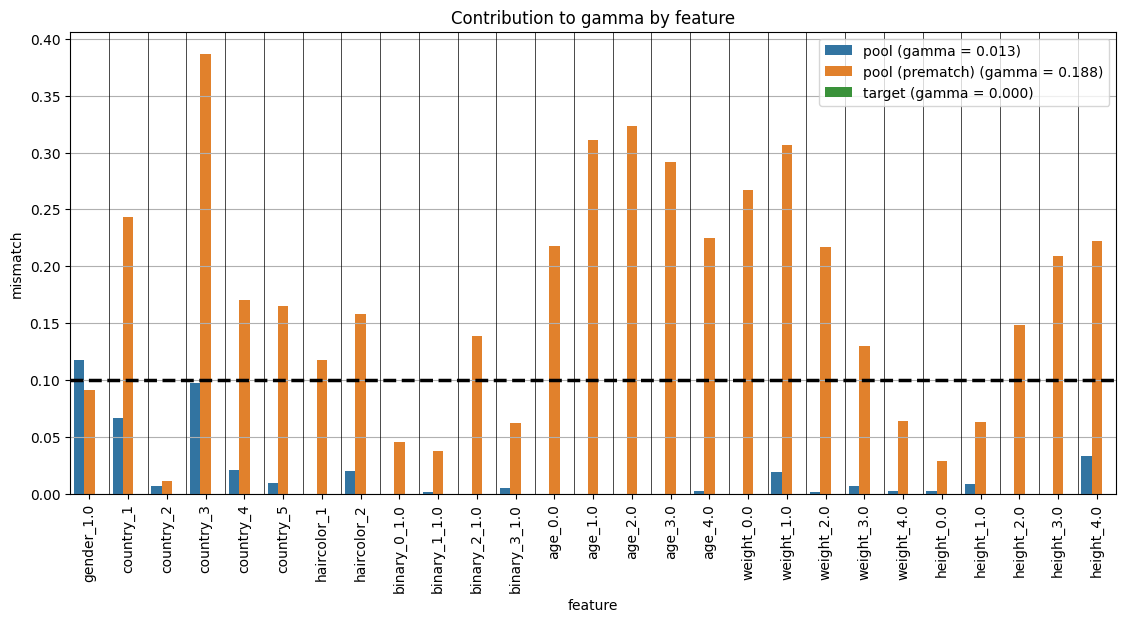

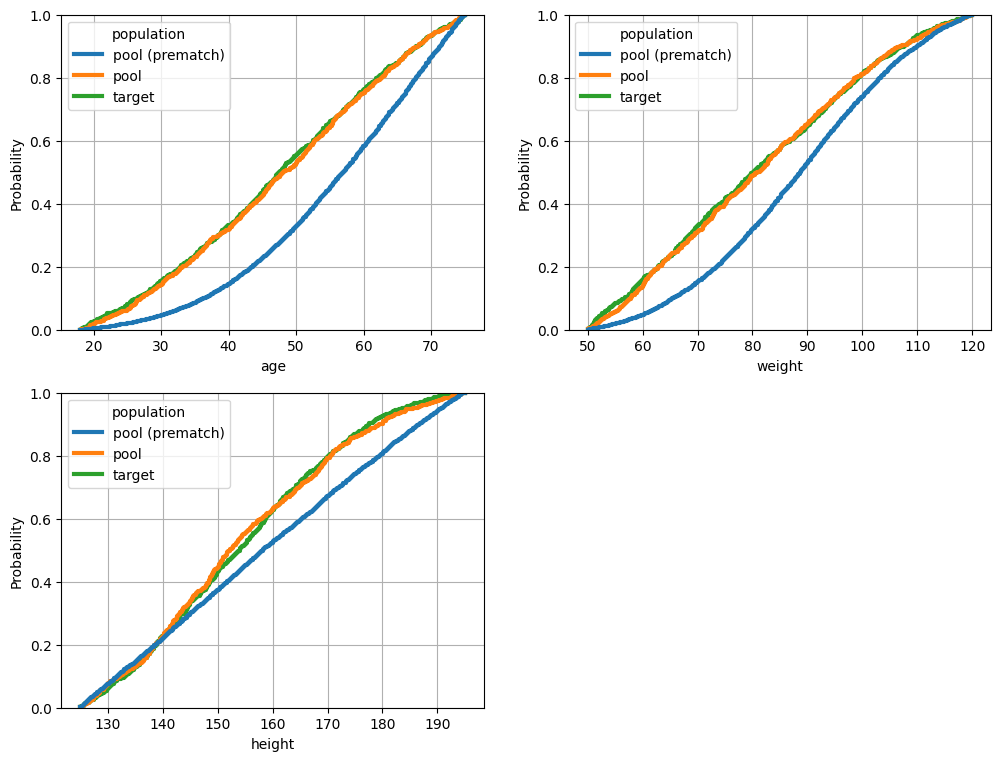

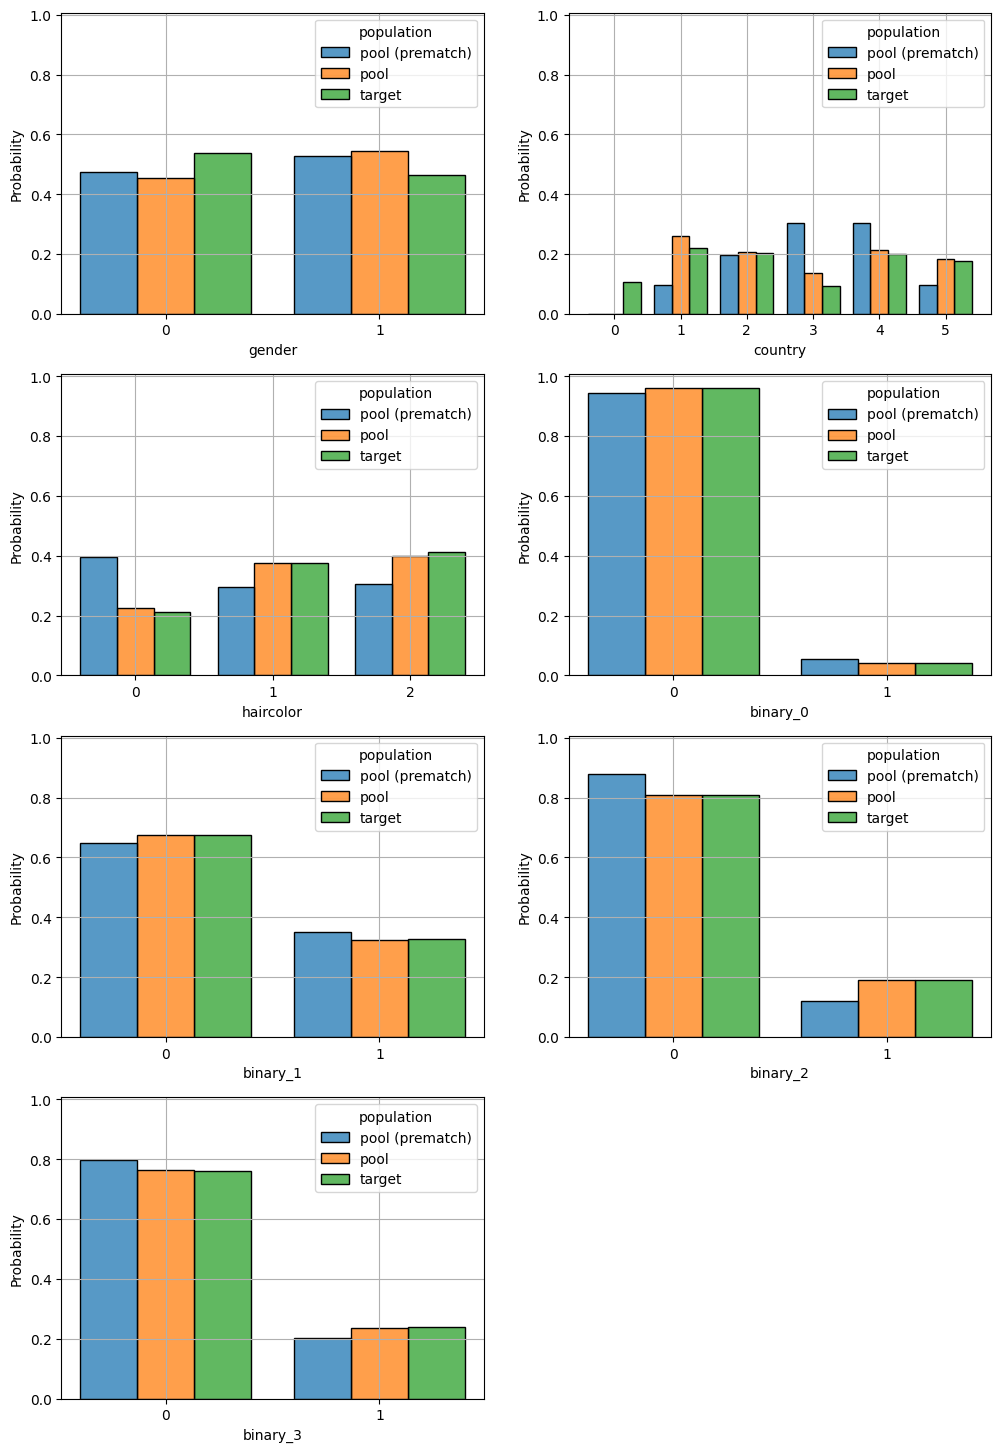

In [11]:
%matplotlib inline

match = matcher.get_best_match()
m_data = m.copy().get_population('pool')
m_data.loc[:, 'population'] = m_data['population'] + ' (prematch)'
match.append(m_data)
fig = plot_per_feature_loss(match, gamma, 'target', debin=False)
fig = plot_numeric_features(match, hue_order=['pool (prematch)', 'pool', 'target', ])
fig = plot_categoric_features(match,  hue_order=['pool (prematch)', 'pool', 'target'])